# Calculate Prediction Step: 

In [56]:
from math import *
from math import pi as M_PI
from decimal import Decimal


**Quiz Question:**

**Given the car’s last position was at (102 m, 65 m) with a heading of (5pi)/8 radians, the car’s velocity was 110 m / s, and the car’s yaw rate was pi/8 rad / s over the last 0.1 seconds, what is the car’s new position and heading?**


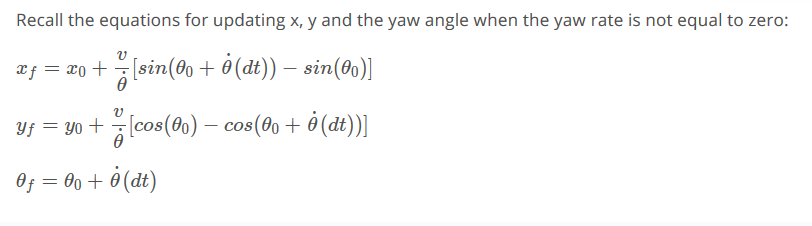

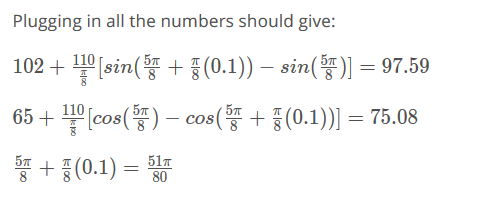

# Transform

Observations in the car coordinate system can be transformed into map coordinates (xm and ym) by passing car observation coordinates (xc and yc), map particle coordinates (xp and yp), and our rotation angle (-90 degrees) through a homogenous transformation matrix. This homogenous transformation matrix, shown below, performs rotation and translation.
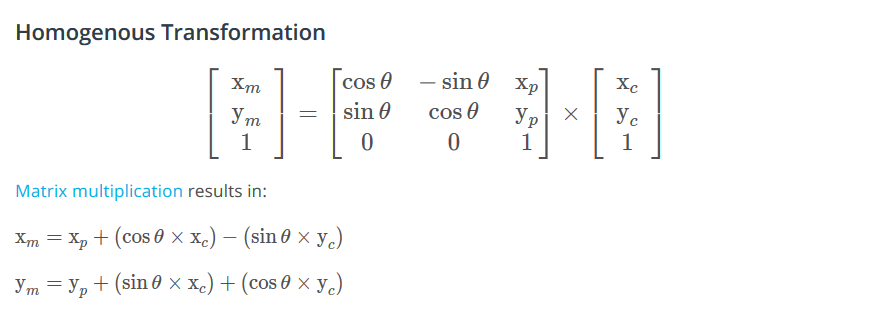


In [57]:
def Transformed_Observation(x_particle, y_particle, heading_particle, x_obs, y_obs):
    theta = (heading_particle *( pi / 180))
    x_map=x_particle+(cos(theta)*x_obs)-(sin(theta)*y_obs)
    y_map=y_particle+(sin(theta)*x_obs)-(cos(theta)*y_obs)
    return (int(round(x_map)),int(round(y_map)))

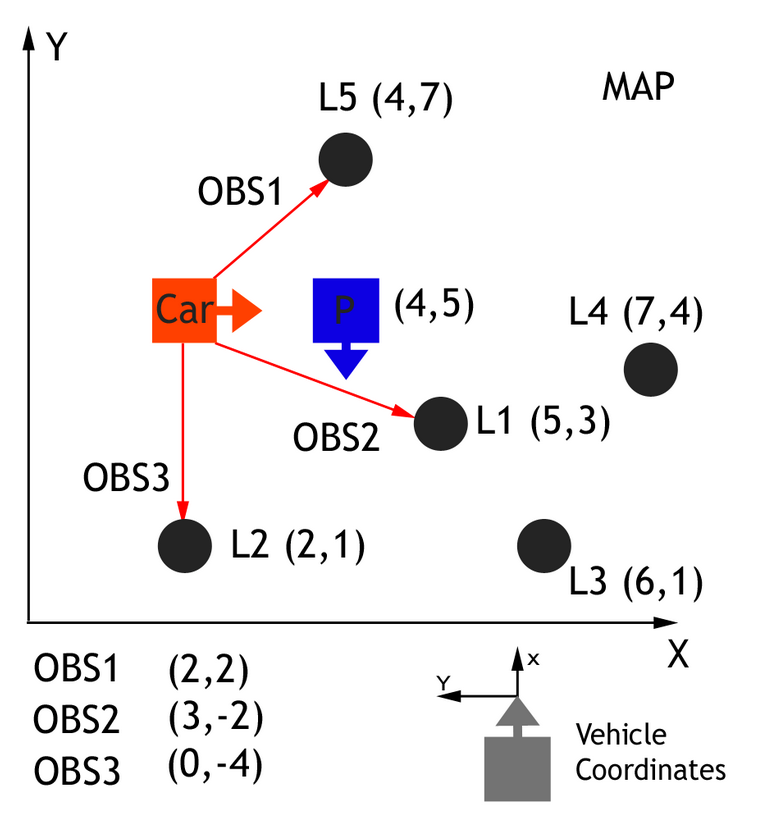

**Transformation for OBS1: OBS1 is the sensor observation reported from the sensor. As noted in the figure, OBS1 is (2,2). What is the position of OBS1 in map coordinates (x_map,y_map)?**

In [58]:
print('TOBS1',Transformed_Observation(4, 5, -90, 2, 2))

TOBS1 (6, 3)


**OBS2 is the sensor observation reported from the sensor. As noted in the figure, OBS2 is (3,-2). What is the position of OBS2 in map coordinates (x_map,y_map)? **

In [59]:
print('TOBS2',Transformed_Observation(4, 5, -90, 3, -2))

TOBS2 (2, 2)


**OBS3 is the sensor observation reported from the sensor. As noted in the figure, OBS3 is (0,-4). What is the position of OBS3 in map coordinates (x_map,y_map)?**

In [60]:
print('TOBS3',Transformed_Observation(4, 5, -90, 0, -4))

TOBS3 (0, 5)


# Association

Now that observations have been transformed into the map's coordinate space, the next step is to associate each transformed observation with a land mark identifier. In the map exercise above we have 5 total landmarks each identified as L1, L2, L3, L4, L5, and each with a known map location.

We need to associate each transformed observation TOBS1 (6,3), TOBS2(2,2), TOBS3(0,5) with one of these 5 identifiers. To do this we must associate the closest landmark to each transformed observation.
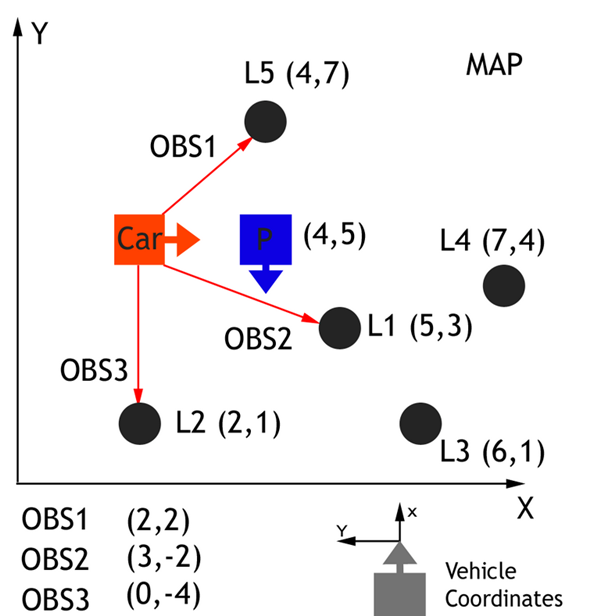
Look at the distances from TOBS1 to each of the 5 landmarks, for which landmark is the landmark to car distance the shortest?

**TOBS1 (6,3) associated with L1 (5,3)**

**TOBS2 (2,2)associated with L2(2,1)**

**TOBS3 (0,5) associated with L5(4,7) **

**TOBS3 can be associated with either L2, or L5, since they are the same distance apart.**



# Particle Weights Update
We can calculate particle weights using the following equation:

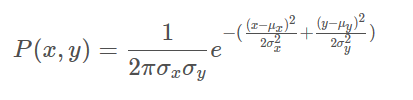


* Recall that for this example the standard deviation for both x and y is 0.3.
* x and y are the observations in map coordinates from landmarks  and μx, μy are the coordinates of the nearest landmarks. These should correspond to the correct responses from previous section (Association).



In [42]:
def multiv_prob( sig_x,  sig_y,  x_obs,  y_obs, mu_x,  mu_y):
    gauss_norm = 1 / (2 * M_PI * sig_x * sig_y);

    # calculate exponent
    exponent = (pow(x_obs - mu_x, 2) / (2 * pow(sig_x, 2))) + (pow(y_obs - mu_y, 2) / (2 * pow(sig_y, 2)))

    # calculate weight using normalization terms and exponent
    weight = gauss_norm * exp(-exponent)

    return weight


####  OBS1 Multivariate-Gaussian Probability

What is the calculated Multivariate-Gaussian probability density of OBS1?

In [54]:
#OBS1 values
sig_x = 0.3;
sig_y = 0.3;
x_obs = 6;
y_obs = 3;
mu_x = 5;
mu_y = 3;

In [55]:
print('%.2E' %Decimal(multiv_prob( sig_x,  sig_y,  x_obs,  y_obs, mu_x,  mu_y)))

6.84E-03


#### OBS2 Multivariate-Gaussian Probability

What is the calculated Multivariate-Gaussian probability density of OBS2? 

In [48]:
#OBS2 values

sig_x = 0.3
sig_y = 0.3
x_obs = 2
y_obs = 2
mu_x = 2
mu_y = 1

In [47]:
print('%.2E' %Decimal(multiv_prob( sig_x,  sig_y,  x_obs,  y_obs, mu_x,  mu_y)))

6.84E-03


### OBS3 Multivariate-Gaussian Probability

What is the calculated Multivariate-Gaussian probability density of OBS3?

In [61]:
#OBS3 values
sig_x = 0.3
sig_y = 0.3
x_obs = 0
y_obs = 5
mu_x = 4
mu_y = 7

In [62]:
print('%.2E' %Decimal(multiv_prob( sig_x,  sig_y,  x_obs,  y_obs, mu_x,  mu_y)))

9.83E-49


#### Particle's Final Weight

To get the final weight just multiply all the calculated measurement probabilities together.


In [63]:
print('%.2E'%Decimal(6.84E-03*9.83E-49*6.84E-03))


4.60E-53
